# Problem Statement

A clique in an undirected graph $𝐺=(𝑉,𝐸)$ is a subset of vertices $C \subset V$ such that every pair of vertices in $C$ is connected by an edge.
A maximal clique is a clique that cannot be extended by including any adjacent vertex , i.e., it’s not contained within any larger clique.

# Background
1. Let M(G) denote the set of all maximal cliques of G. It is known that there exist n-vertex graphs with $3^{n∕3}$ maximal cliques
2. Worst case of running pivot is $3^{n/3}$, but is faster in practice on sparse graphs

## Pruning Rules
1. Pivot in Bron–Kerbosch (Tomita variant)

- The pivot is used to minimize the number of recursive calls.
- A pivot vertex `u` is selected from `P ∪ X`, typically the one with the maximum number of neighbors in `P`
- The algorithm then explores only vertices in `P` that are *not* adjacent to `u`** (i.e., `P \ N(u)`).
- **Might not be possible in implement in our**


2. Remove vertices with degree less than current clique size, **can be easily implemented**
3. Connected Component Decomposition 
   - Decomposing `P` into connected subgraphs ensures each component is processed independently.
   - **Can be implemented on `ExpandTo`**.
4. If vertex v has a neighborhood that is a subset of vertex u’s neighborhood (i.e., $N(v)⊆N(u)$, then every clique that contains v also contains u.
Hence, v can never generate a new maximal clique that doesn’t already include u. **Can we used initially to shrink ExpandFrom**


# New Impl

**Intermediate Arrays**
- **ExpandFrom** → vertices used as starting points for expansion  
- **ExpandMid** → intermediate vertices paired with the current start vertex  
- **ExpandTo** → vertices used to expand from the current pair  
- **Visited** → vertices already used as starting points  


### **Algorithm Steps**

1. **Initialization**
   - `ExpandFrom ← all vertices`
   - `ExpandTo ← all vertices except the first`
   - `ExpandMid ← ∅`

2. **Termination Condition**
   - If `ExpandFrom` or `ExpandTo` is empty → **Stop**

3. **Expansion Phase**
   - Pick the first vertex `v` from `ExpandFrom`
   - Add `v` to the current clique

4. **Handle Intermediate Vertex**
   - If `ExpandMid ≠ ∅`:
     - Try adding the vertex in `ExpandMid` to the current clique  
     - If addition fails:
       - Remove that vertex from `ExpandMid`
       - Move the first vertex from `ExpandTo` into `ExpandMid`
       - **Recurse / Call Again**
     - Else (if addition succeeds):
       - Continue expanding

5. **Expand Using `ExpandTo`**
   - Try adding vertices from `ExpandTo` to the current clique one by one  
   - If addition fails for a vertex, skip to the next

6. **Clique Found**
   - If `|clique| > 0`:
     - Record the clique vertices  
     - `ExpandFrom ← clique vertices`
     - `ExpandMid ← first unvisited vertex in clique`
     - `ExpandTo ← remaining unvisited vertices`
     - Mark the current vertex as **Visited**
     - **Recurse / Call Again**

7. **No Clique Found (Mid not empty)**
   - Move the first vertex from `ExpandTo` → `ExpandMid`
   - **Recurse / Call Again**

8. **No Clique Found (Mid empty)**
   - Remove the first vertex from both `ExpandFrom` and `ExpandTo`
   - **Recurse / Call Again**


![img](pics/neworder.jpeg)

![img](pics/neworder2.jpeg)

### Test  Graph 
![img](pics/test.png)

### Test 1 Graph 
![img](pics/test1.png)

### Test  2 Graph 
![img](pics/test2.png)

### Test 3 Graph 
![img](pics/test3.png)





# Issue

Lets say we have the following graph 
<div style="display:flex; gap:20px; align-items:flex-start;">
  <img src="./pics/graph.jpg" width="45%" style="max-height:300px; object-fit:contain;">
  <img src="./pics/graph_csr.jpg" width="45%" style="max-height:300px; object-fit:contain;">
</div>

**We search all posibilities**

1. We keep order to avoid duplicates say we search $(0,1)$ and not $(1,0)$

<div style="display:flex; gap:20px; align-items:flex-start;">
  <img src="./pics/all_emun.jpg" width="65%" style="max-height:1000px; object-fit:contain;">
</div>


**Issues**
1. At each state say $(0,1)$ when we are trying to add $2$ we need to seach if $2$ in in neighbors of both $0$ and $1$. which is time consuming. 
2. The only time we will if a clique is a maximal clique is then we searched all other posibilities that can be added and found that they cannot be added. 
3. The issue arises in say $(0,4)$ we cannot add anything but it still doesn't make it a maximal clique. 

**Search all posibilities that in neghbors**
<div style="display:flex; gap:20px; align-items:flex-start;">
  <img src="./pics/all_neigh.jpg" width="65%" style="max-height:1000px; object-fit:contain;">
</div>

**Solved**
1. Neighbor search problem 
2. check all posibilities to declare maximal clique, here if not $\cap$ neighbor, declare maximal clique

**Issue**
1. The issue arises in say $(0,2)$ we cannot add anything but it still doesn't make it a maximal clique. 

**PXR**
1. Add a array that tracks verticies that cannot be added
<div style="display:flex; gap:20px; align-items:flex-start;">
  <img src="./pics/pxr.jpg" width="65%" style="max-height:1000px; object-fit:contain;">
</div>

**Solves**
1. The issue arises in say $(0,2)$ we cannot add anything but it is not a maximal clique as $X!=\phi$

**Issue in embedding in our implementation**
So the only thing that can avoid, duplicates is PXR, but lets say we found a clique $(0,1,2)$ starting from $0$. 
1. As per PXR we need to add it to $X$ as we start to backtrack. 
2. In our reorder stragerty we need to reoder, but we cannot add the zero to $X$ as we still have the posibility of a clique say $(0,2,3)$, as we don't backtrack we reorder

In [4]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s  0:00:00


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def read_custom_graph(filename):
    """
    Reads graph in the format:
    n m
    u v1 v2 v3 ...
    """
    with open(filename, "r") as f:
        first = f.readline().strip().split()
        n, m = map(int, first)

        G = nx.Graph()

        # Add all nodes
        for i in range(n):
            G.add_node(i)

        # Read adjacency lists
        for line in f:
            parts = line.strip().split()
            if not parts:
                continue

            u = int(parts[0])
            neighbors = list(map(int, parts[1:]))

            for v in neighbors:
                G.add_edge(u, v)

    return G

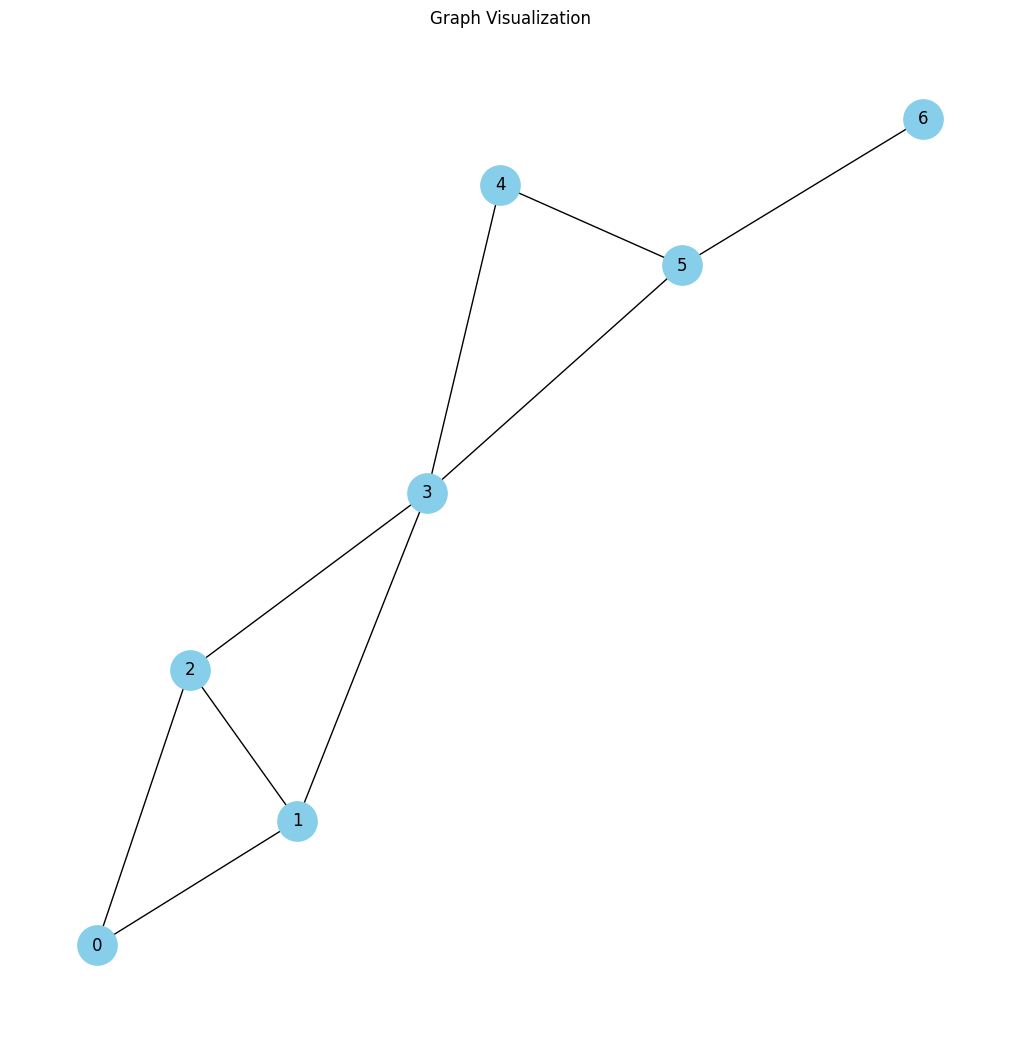

In [10]:
filename = "orginal/data/test5.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

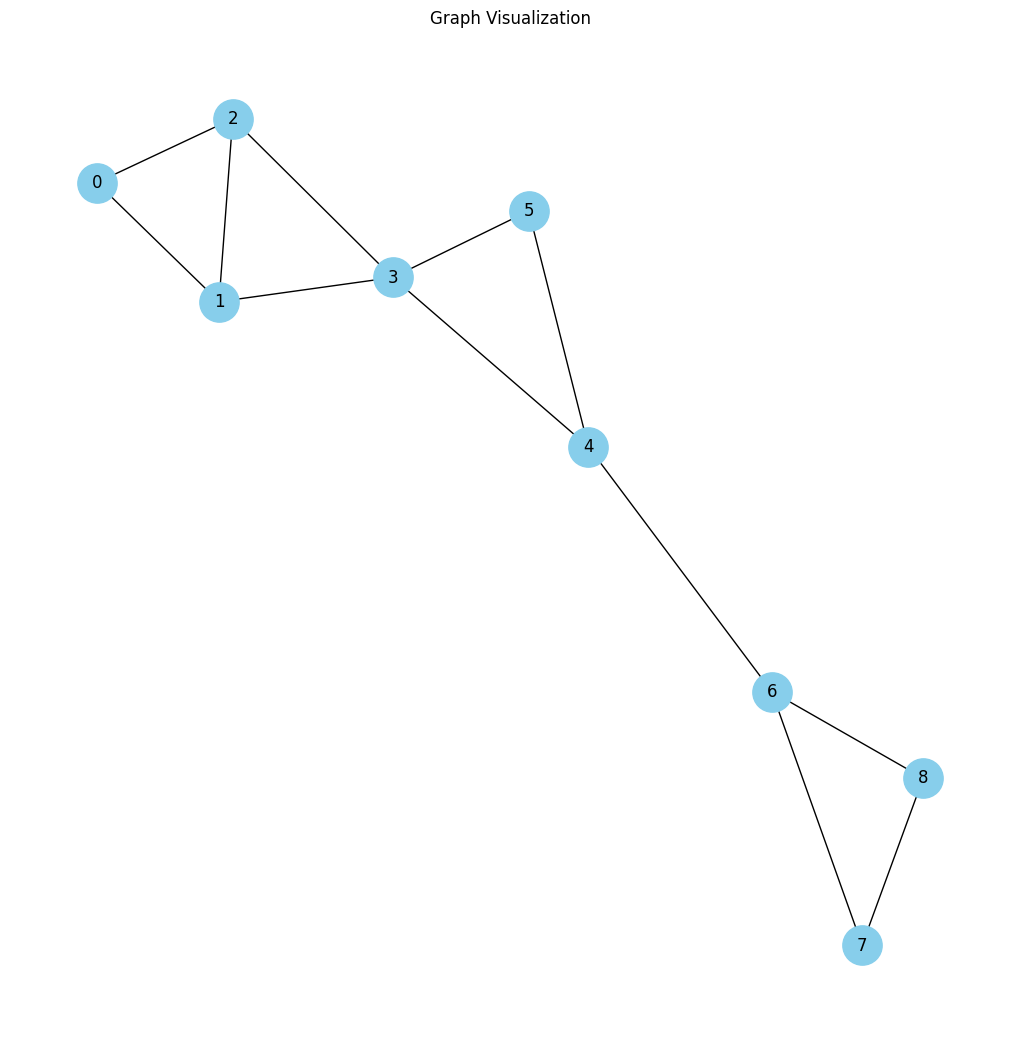

In [11]:
filename = "orginal/data/test6.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

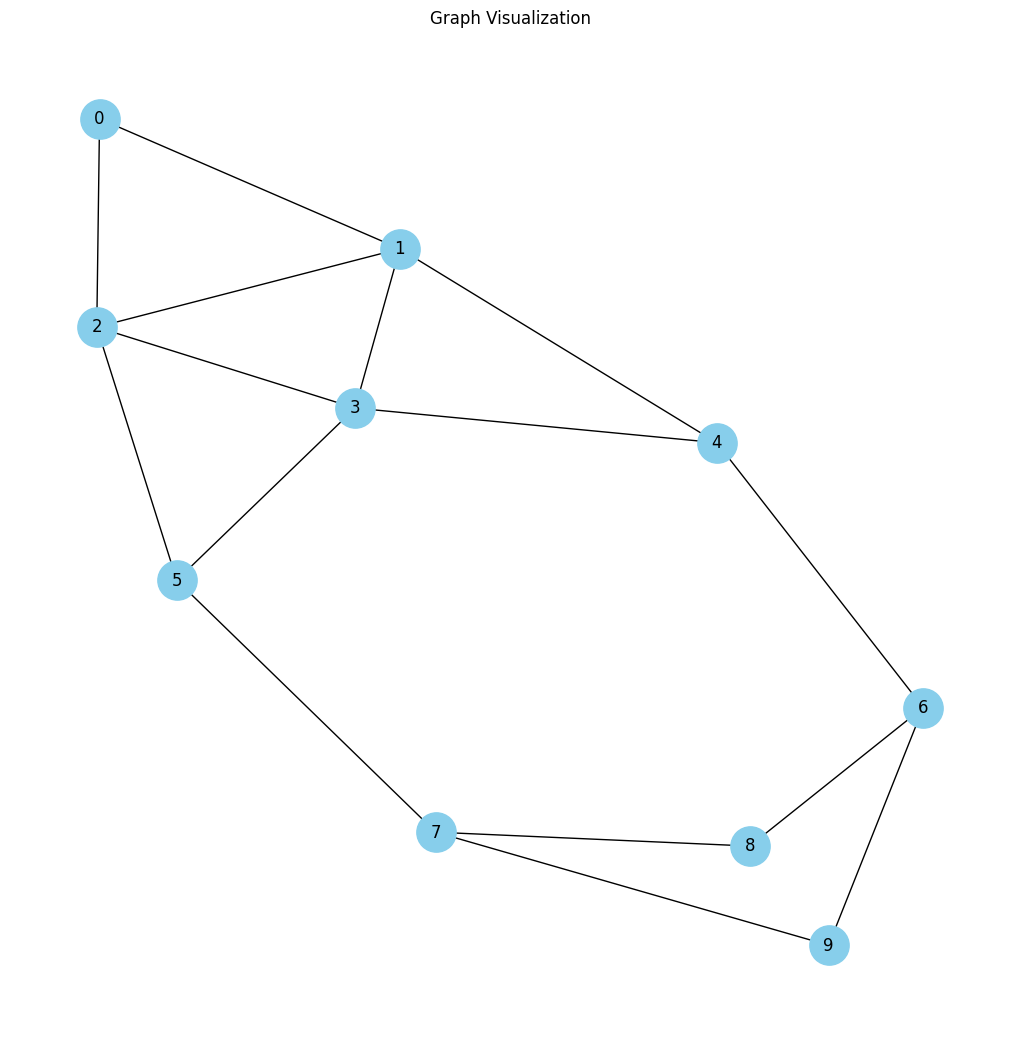

In [12]:
filename = "orginal/data/test7.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

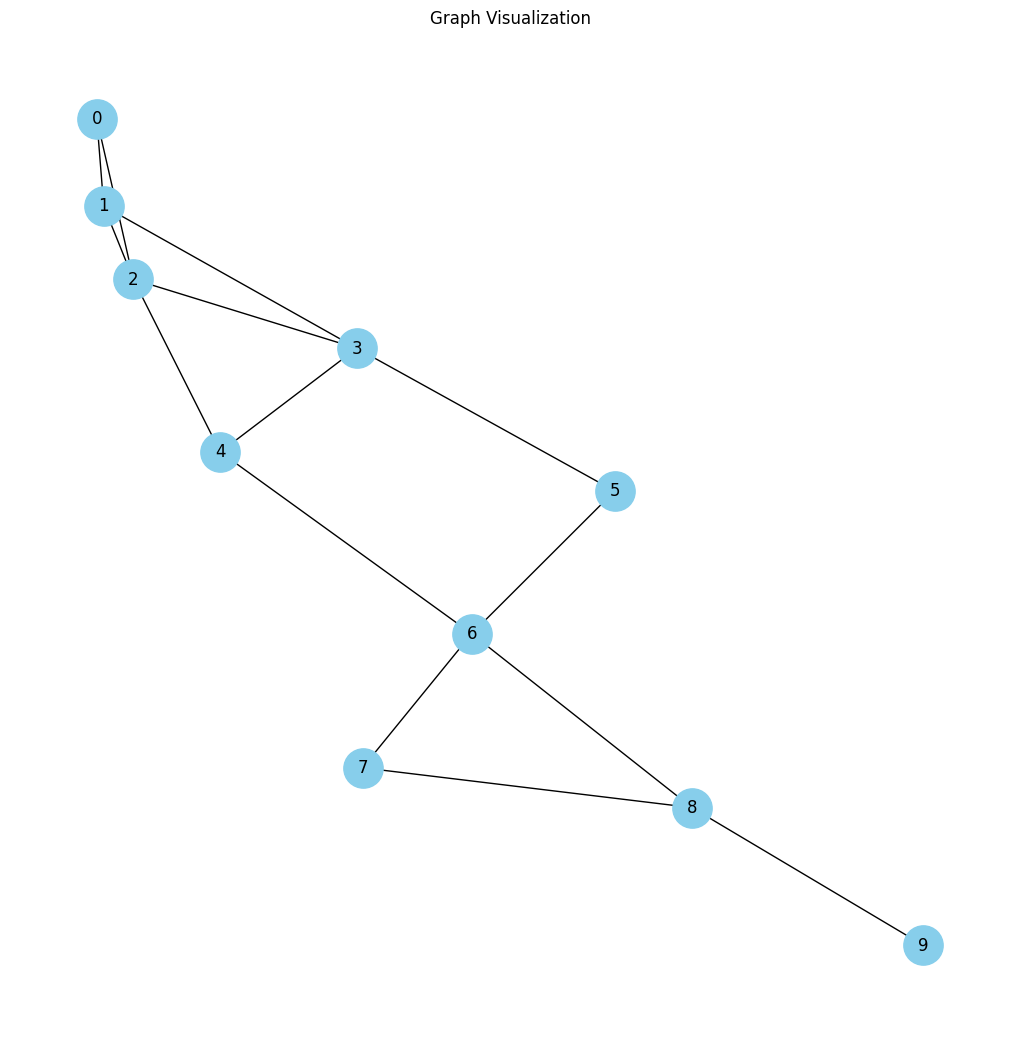

In [13]:
filename = "orginal/data/test8.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

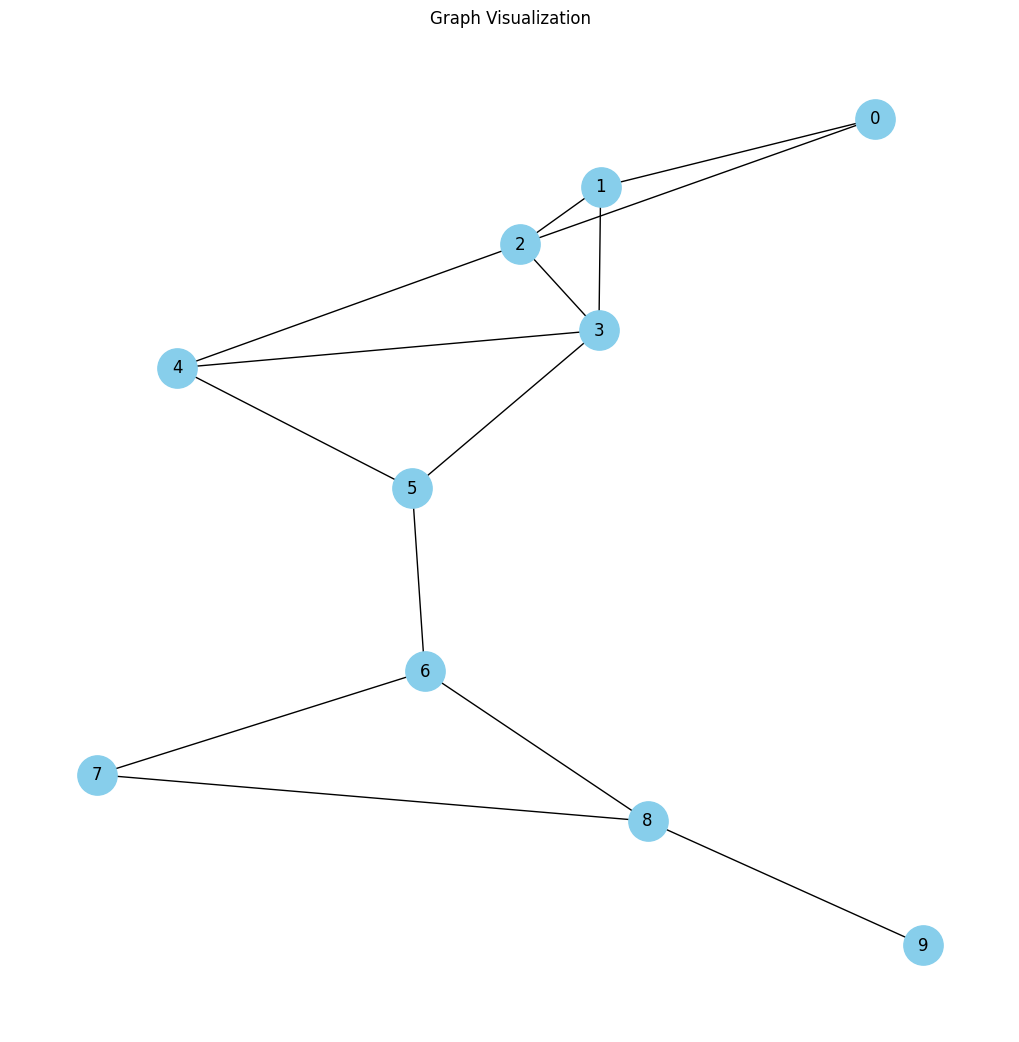

In [14]:
filename = "orginal/data/test9.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

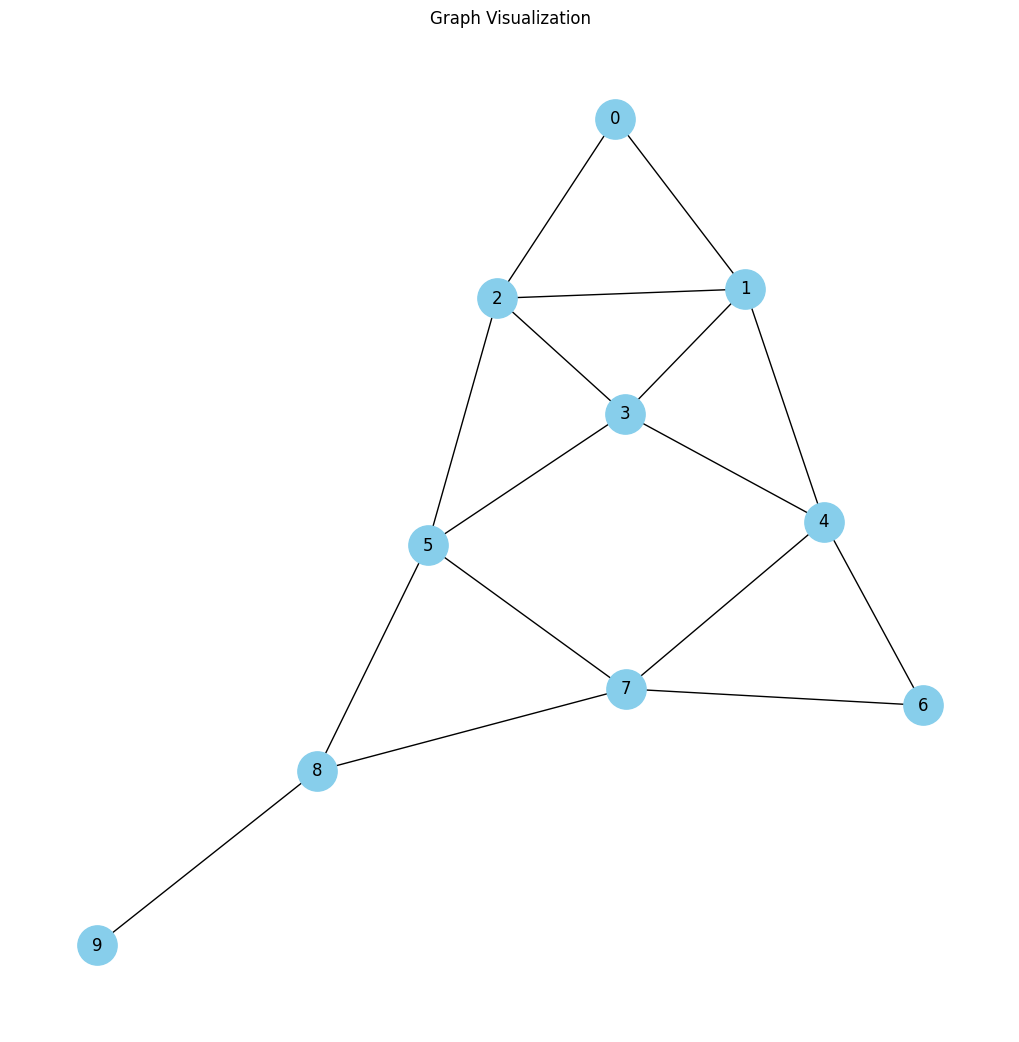

In [15]:
filename = "orginal/data/test10.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

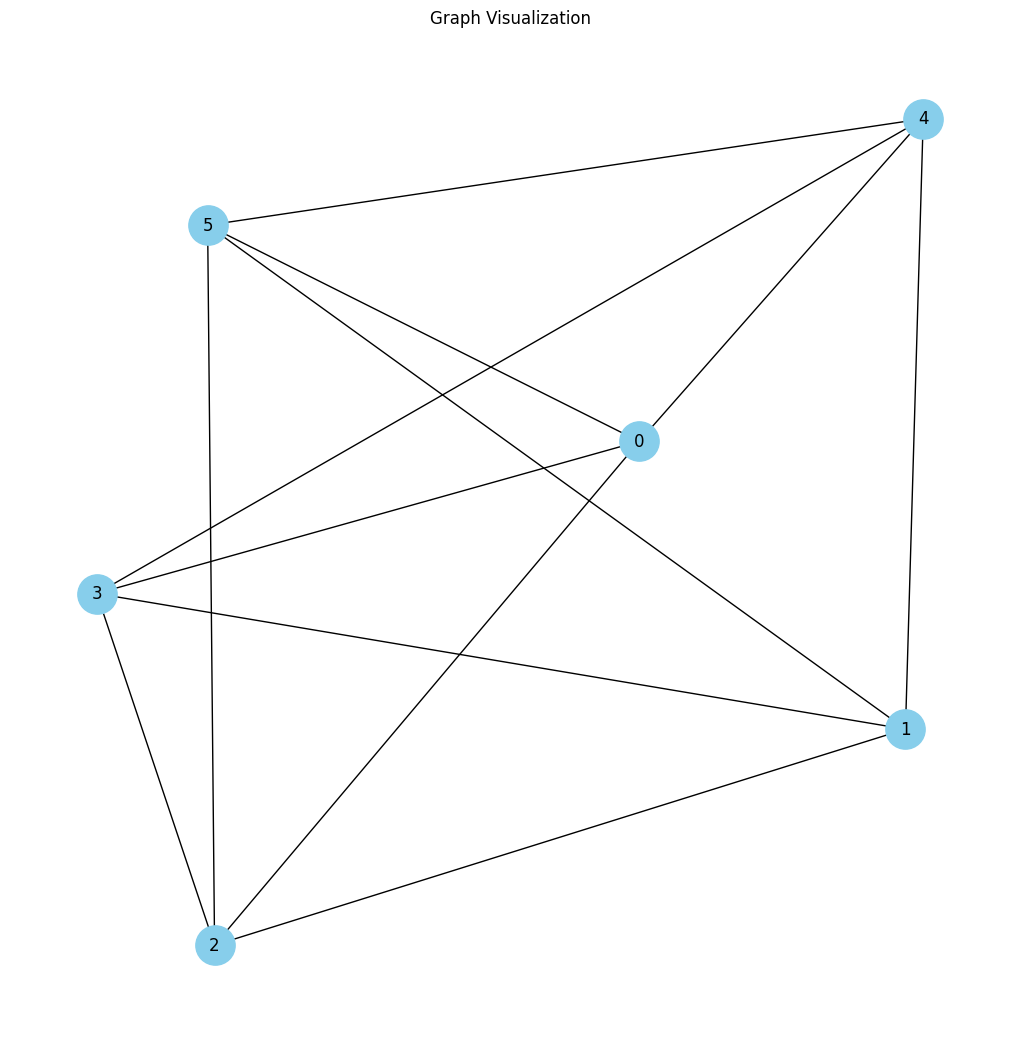

In [16]:
filename = "orginal/data/test11.txt"   # <-- change to your file name
G = read_custom_graph(filename)


# Plot
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=12)
plt.title("Graph Visualization")
plt.show()

## Updated Algo Issues

**Additions**
1. will only expand tree staring with $x$ to neighbors of $x$. 
2. At every step when we add a vertex to partial clique, next expantion will be current expantion intersect neighbors of vertex added
3. Only neghbors of vertex that are greater than vertex are considered. 
    1. $N_0 = \{1,2,3\} \implies \{1,2,3\}$
    2. $N_1 = \{0,2,3\} \implies \{2,3\}$
    3. $N_2 = \{0,1,3\} \implies \{3\}$

**Starting Trees**

Found clique $0123$ when expanding head $0$


![algoStep1](pics/algo_step_1.jpg)

**After First Reorder**
1. Need to remove trees starting with $1,2,3$
2. need to add $\{0,1,2,3\}$ to rest of trees
    1. $N_4 \cup \{0,1,2,3\} = \{3\}$
    2. $N_5 \cup \{0,1,2,3\} = \{3\}$
    3. $N_x \cup \{0,1,2,3\} = \phi$ for $x \in \{6,7,8,9,10,11,12,13,14\}$

**Will add 3 to tree starting with $4$ and $5$**


![algostep2](pics/algo_step_2.jpg)
